In [2]:
!pip install openpyxl
!pip install swat
!pip install seaborn
!pip install time
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download es_core_news_sm

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


2021-11-23 23:19:57.168161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-23 23:19:57.168968: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
file_name =r'Ordenes de compra PORTAL 1K (datos completo).xlsx'
sheet =  'Datos estudio'

import pandas as pd
data_pro = pd.read_excel(io=file_name, sheet_name=sheet)

data_pro.head(5)

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,...,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,...,NaN,23.364,27.803,4.439,46.728,55.606,2021-11-10,NaN,NaN,NaN
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,...,1.0,1.476.972,1.757.597,280.625,1.476.972,1.757.597,2021-11-10,NaN,NaN,NaN
2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,...,NaN,15.500,15.500,0,155.000,155.000,2021-11-10,NaN,NaN,NaN
3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,...,NaN,22.000,22.000,0,1.100.000,1.100.000,2021-11-10,NaN,NaN,NaN
4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,...,7.0,92.084,109.580,17.496,644.588,767.060,2021-11-10,NaN,NaN,NaN


In [4]:
data_pro.columns

Index(['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA ENTREGA',
       'FECHA APROBACION', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'DIRECCION FACTURACION',
       'CENTRO DE COSTOS', 'PRESUPUESTO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CODIGO PORTAL', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

<AxesSubplot:xlabel='CATEGORÍA'>

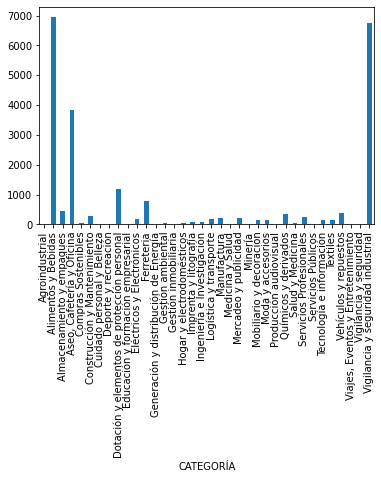

In [5]:
data_pro.groupby(['CATEGORÍA']).size().plot(kind="bar")

<AxesSubplot:xlabel='ESTADO'>

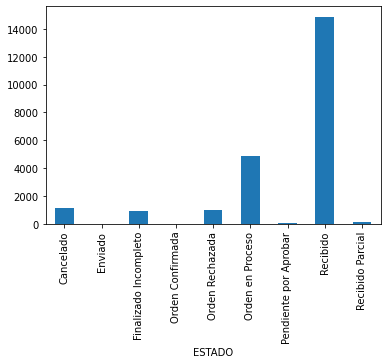

In [6]:
data_pro.groupby(['ESTADO']).size().plot(kind="bar")

<AxesSubplot:xlabel='SUBCATEGORIA'>

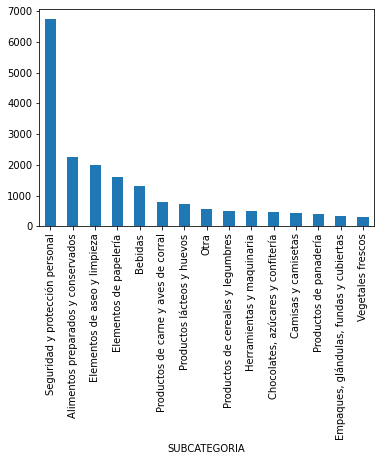

In [7]:
data_pro.groupby(['SUBCATEGORIA']).size().sort_values(ascending=False)[:15].plot(kind="bar")

<AxesSubplot:xlabel='PROVEEDOR'>

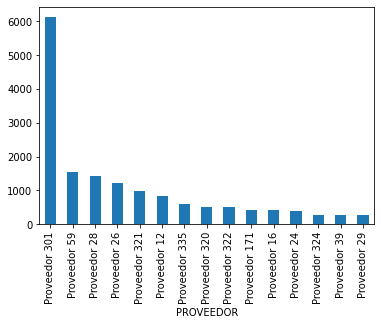

In [8]:
data_pro.groupby(['PROVEEDOR']).size().sort_values(ascending=False)[:15].plot(kind="bar")

<AxesSubplot:xlabel='USUARIO'>

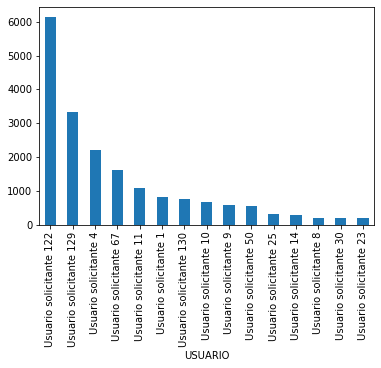

In [9]:
data_pro.groupby(['USUARIO']).size().sort_values(ascending=False)[:15].plot(kind="bar")

In [10]:
data_pro.groupby(['PRODUCTO O SERVICIO']).size().sort_values(ascending=False)[:20]

PRODUCTO O SERVICIO
6 Bota de seguridad media caña dielectrica con puntera de seguridad        936
85 Overol industrial                                                       357
7 Botas de caucho con puntera negra caña alta                              266
8 Bota pvc de seguridad caña alta, dielectrica con puntera de seguridad    250
46 Guantes nitrilo azul no esteriles                                       188
30 Lentes de seguridad oscuro                                              181
86 Camisa oxfort manga larga                                               169
PAPEL BOND 72 g CARTA x 500 H ECOLOGICO NATURAL                            148
87 Pantalon jean dotacion                                                  139
34 Guantes algodón con cubierta en látex                                   124
48 Guantes vaqueta ingeniero reforzado                                     117
2 Monogafas contra salpicaduras liquidas y sustancias quimicas             109
41 Guantes de caucho corto      

In [13]:
#Stop words
#importing stop words from English language.
import spacy
import spacy.lang.es
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 551
First ten stop words: ['un', 'lejos', 'veces', 'estados', 'tarde', 'dia', 'tan', 'diferentes', 'manifestó', 'trabaja', 'consigo', 'intentar', 'vamos', 'todo', 'diferente', 'primeros', 'habían', 'me', 'propio', 'hago']


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [15]:
data_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23083 entries, 0 to 23082
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO PEDIDO            23083 non-null  object 
 1   ORDEN NÚMERO             23083 non-null  object 
 2   FECHA ORDEN              23083 non-null  object 
 3   FECHA ENTREGA            18770 non-null  object 
 4   FECHA APROBACION         21950 non-null  object 
 5   CATEGORÍA                23083 non-null  object 
 6   SUBCATEGORIA             23083 non-null  object 
 7   PROVEEDOR                23083 non-null  object 
 8   USUARIO                  23083 non-null  object 
 9   USUARIO APROBADOR        21950 non-null  object 
 10  DIRECCION PEDIDO         23083 non-null  object 
 11  DIRECCION FACTURACION    10828 non-null  object 
 12  CENTRO DE COSTOS         16672 non-null  object 
 13  PRESUPUESTO              18581 non-null  object 
 14  PORTAL                

In [16]:
data_pro.SUBCATEGORIA.value_counts()


Seguridad y protección personal                    6733
Alimentos preparados y conservados                 2243
Elementos de aseo y limpieza                       1997
Elementos de papelería                             1618
Bebidas                                            1328
                                                   ... 
Calefacción, ventilación y circulación del aire       1
Medios impresos                                       1
Almacenaje                                            1
Generación de energía                                 1
Rodamientos, cojinetes ruedas y engranajes            1
Name: SUBCATEGORIA, Length: 149, dtype: int64

In [17]:
# Load English tokenizer, tagger, parser, NER and word vectors
import string

parser =spacy.load("es_core_news_sm")
punctuations = string.punctuation


# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [18]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [19]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))


In [20]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)


In [21]:
from sklearn.model_selection import train_test_split

X = data_pro['PRODUCTO O SERVICIO'] # the features we want to analyze
ylabels = data_pro.SUBCATEGORIA # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [25]:
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.linear_model import LogisticRegression
stop_words = spacy.lang.es.stop_words.STOP_WORDS

classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000002A7F1D02FA0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x000002A7F087D5E0>)),
                ('classifier', LogisticRegression())])

In [26]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted, average='micro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted, average='micro' ))

Logistic Regression Accuracy: 0.9484476534296029
Logistic Regression Precision: 0.9484476534296029
Logistic Regression Recall: 0.9484476534296029


In [28]:
import numpy as np
results = pd.DataFrame(data={'predicted': predicted, 'actual': y_test})
results['result'] = np.where(results['predicted']==results['actual'], 1, 0)
results.sort_values(by='result').head(20)

,predicted,actual,result
4706,Seguridad y protección personal,Elementos de protección personal,0
6440,Herramientas y maquinaria,Plomería,0
976,Bonos promocionales,Materiales de papel,0
1822,Seguridad y protección personal,Elementos de protección personal,0
21861,Otra,Elementos de papelería,0
22792,Herramientas y maquinaria,Elementos de papelería,0
10457,Camisas y camisetas,Prendas uniformes,0
9570,Elementos de aseo y limpieza,Productos lácteos y huevos,0
3937,"Empaques, glándulas, fundas y cubiertas",Elementos de bioseguridad,0
22953,Seguridad y protección personal,Accesorios de control de automatización,0


In [29]:
results.groupby(['result']).size()

result
0     357
1    6568
dtype: int64

In [30]:
results.join(data_pro['PRODUCTO O SERVICIO']).sort_values(by='result').head(20)

,predicted,actual,result,PRODUCTO O SERVICIO
4706,Seguridad y protección personal,Elementos de protección personal,0,GUANTE PROTECCION AL CORTE NARA INOX
6440,Herramientas y maquinaria,Plomería,0,SOLDADURA PVC DE 1/8
976,Bonos promocionales,Materiales de papel,0,Tarjeta Posventa
1822,Seguridad y protección personal,Elementos de protección personal,0,CARETA FOTOSENSIBLE DELTA
21861,Otra,Elementos de papelería,0,"5000018 CINTA DE ENMASCARAR 1/2""(12MM)"
22792,Herramientas y maquinaria,Elementos de papelería,0,"7770640 ACONDICIONADOR DE BANDAS - CORREAS ""CR..."
10457,Camisas y camisetas,Prendas uniformes,0,CAMISA EN DRIL
9570,Elementos de aseo y limpieza,Productos lácteos y huevos,0,LECHE ENTERA PAST.* 1000 cc
3937,"Empaques, glándulas, fundas y cubiertas",Elementos de bioseguridad,0,"GUANTE NITRISHIELD NITRILO PREMIUM 6 MIL 12""..."
22953,Seguridad y protección personal,Accesorios de control de automatización,0,S777703 BORNERA TIPO RESORTE PARA TIERRA


In [31]:
import spacy
from spacy import displacy
nlp=spacy.load('es_core_news_sm')
for row in data_pro['PRODUCTO O SERVICIO'].unique()[:10]:
    doc=nlp(row)
    displacy.render(doc, style="ent")

C:\Users\KeyssiArroyo\AppData\Local\Programs\Python\Python39\lib\site-packages\spacy\displacy\__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)
